<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [21]:
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [6]:
data = pd.read_csv("DMV_Written_Tests.csv")
print(data.head())

   DMV_Test_1  DMV_Test_2  Results
0   34.623660   78.024693        0
1   30.286711   43.894998        0
2   35.847409   72.902198        0
3   60.182599   86.308552        1
4   79.032736   75.344376        1


In [7]:
data.shape

(100, 3)

In [19]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]
print(X.shape)
print(y.shape)
print(y.value_counts())

(100, 2)
(100,)
Results
1    60
0    40
Name: count, dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


### Task 3: Visualize the Data
---

Text(0, 0.5, 'DMV_Test_2')

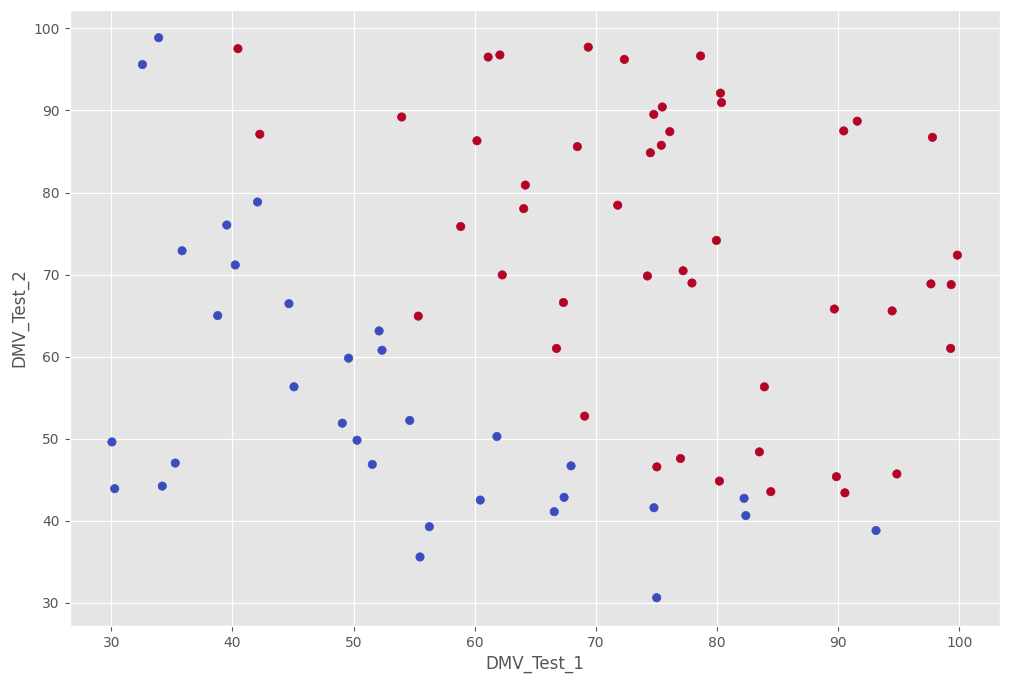

In [24]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,cmap="coolwarm")
plt.xlabel("DMV_Test_1")
plt.ylabel("DMV_Test_2")

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [72]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [73]:
def cost(y,yp):
    return -np.mean(y*np.log(yp)+(1-y)*yp)

def gradient(X,y,yp):
    m = X.shape[0]
    return (1/m)*np.dot(X.T,yp-y)

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [77]:
def preprocess(X):
    if(X.shape[1] == 2):
        X = np.hstack((np.ones((X.shape[0],1)),X))
    return X
preprocess(X_train)
preprocess(X_test)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


### Task 6: Cost and Gradient at Initialization
---

In [76]:
theta = np.random.randn(X_train.shape[1]+1)
initial_cost = cost(y_train,sigmoid(np.dot(X_train,theta)))
initial_grad = gradient(X_train,y_train,sigmoid(np.dot(X_train,theta)))

ValueError: shapes (80,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [47]:
print(initial_cost)
print(initial_grad)

-0.39999999996544655
[21.06963283 21.78606215]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [68]:
error_list = []
def train(X,y,theta,max_iter=300,learning_rate=0.2):
    for i in range(max_iter):
        yp = hypothesis(X,theta)
        loss = cost(y,yp)
        error_list.append(loss)
        theta = theta - (learning_rate*gradient(X,y,yp))
    return theta

In [69]:
theta_ans = train(X_train,y_train,theta)
print(theta_ans)

C:\Users\Nikitha\AppData\Local\Temp\ipykernel_18380\1974211727.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-z))
C:\Users\Nikitha\AppData\Local\Temp\ipykernel_18380\1187373827.py:2: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y*np.log(yp)+(1-y)*yp)


[ 7.0956525 -2.1891106]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

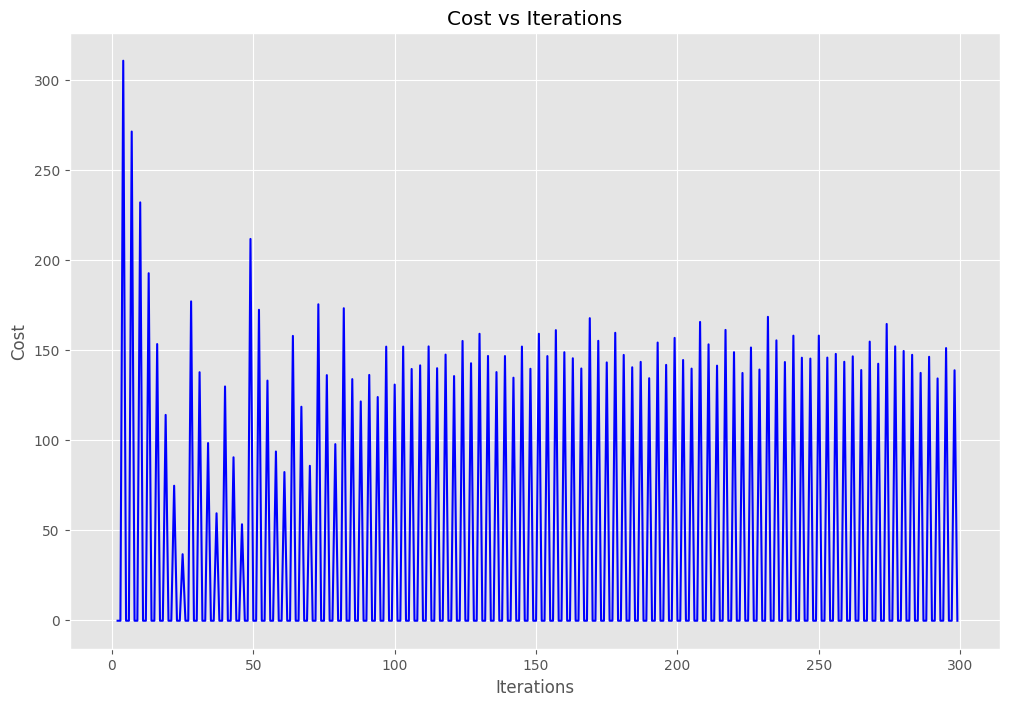

In [63]:
plt.plot(error_list, color="blue")   
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

IndexError: index 2 is out of bounds for axis 0 with size 2

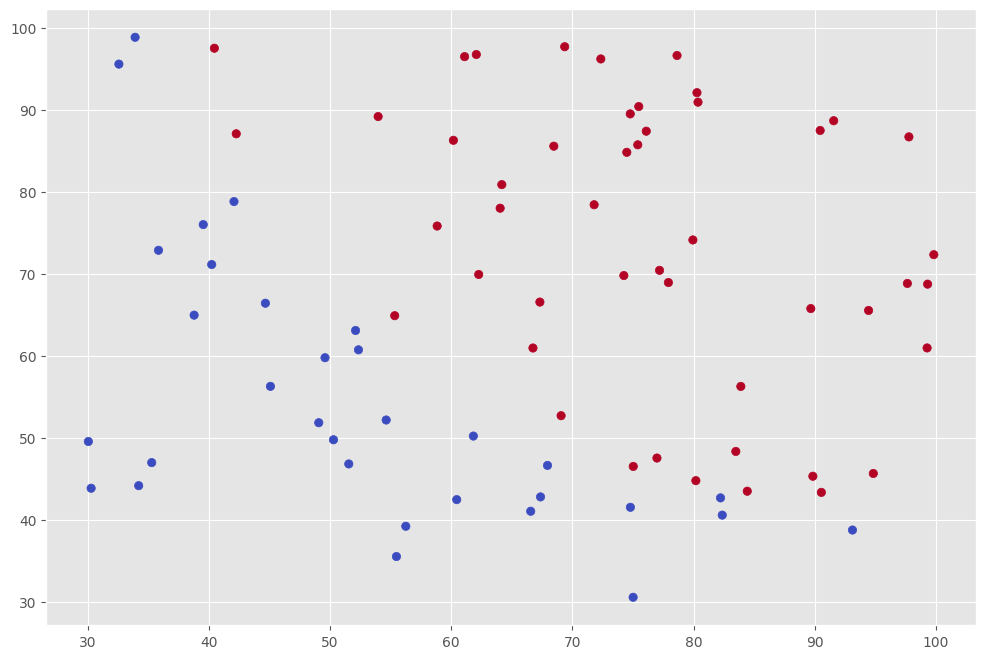

In [66]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,cmap="coolwarm")
x1 = np.linspace(-3,3,6)
x2 = -(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1, x2, color='black')

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$